Install ipgraph version 0.6.9. The most recent version is not working properly. Import all the other stuff.

In [ ]:
!pip install python-igraph==0.9.6
!pip install cairocffi
!pip install ete3
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist, squareform
import igraph as ig
import matplotlib.pyplot as plt
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Read in the Graph Modeling Language(.gml) file of the Complex Graph from PTGL. It is saved as an graph object from the igraph library

In [ ]:
complex_graph = ig.Graph.Read_GML("5xtd_complex_chains_albelig_CG.gml")

Create the labels for the clustering

In [ ]:
labels = ["V1","S8","S7","A6","A2","AB1","A5","A7","A9","V3","S4","S1","A12","V2","S3","S2","A1","S6","A3","A11","A13","AB1","B2","B3","B5","B6","B8","B10","B11","C1","C2","S5","ND2","ND3","ND4L","ND5","ND6","B1","B4","B9","ND4","ND1","A8","B7","A10"]
labels = ["A","B","C","E","F","G","H","I","J","K","L","M","N","O","P","Q","S","T","U","V","W","X","Y","Z","a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","r","s","u","v","w"]

Define helper methods to create newick strings

In [ ]:
def get_newick(node, parent_dist, leaf_names, newick='') -> str:
    """
    Convert sciply.cluster.hierarchy.to_tree()-output to Newick format.

    :param node: output of sciply.cluster.hierarchy.to_tree()
    :param parent_dist: output of sciply.cluster.hierarchy.to_tree().dist
    :param leaf_names: list of leaf names
    :param newick: leave empty, this variable is used in recursion.
    :returns: tree in Newick format
    """
    if node.is_leaf():
        return "%s%s" % (leaf_names[node.id], newick)
    else:
        if len(newick) > 0:
            newick = ")%s" % ( newick)
        else:
            newick = ");"
        newick = get_newick(node.get_left(), node.dist, leaf_names, newick=newick)
        newick = get_newick(node.get_right(), node.dist, leaf_names, newick=",%s" % (newick))
        newick = "(%s" % (newick)
        return newick

def newick_parameters(linkage_matrix, labels):
    """ 

    Convert a given linkage matrix from scipy to a newick string

    """
    ok = sch.to_tree(linkage_matrix)
    okk = sch.to_tree(linkage_matrix).dist
    new = get_newick(ok, okk, labels)
    return new

Create the distance matrix for absolute weight from the complex graph with distance measure "absolute weight". Transform the matrix into an Numpy array.

In [ ]:
adj_matrix_absw = complex_graph.get_adjacency(attribute="absoluteWeight")
adj_array_absw = np.array(adj_matrix_absw.data)

Create an Numpy array with zeros as float values as template for the condensed distance Matrix. A condensed distance matrix contains the elements in the upper triangular part of the square distance matrix, strung together into a 1D array.

In [ ]:
ldim = adj_array_absw.shape[0] 
n = int(ldim * (ldim -1 )/2) 
condensed_matrix = np.zeros(int(n), dtype=float)

Create the condensed distance matrix by transferring the values of the Numpy array of the distance matrix to the condesed matrix template.

In [ ]:
for i in range(ldim):
  for j in range(ldim):
    condensed_matrix[int(ldim * j - j * (j +1) /2 + i-1-j)] = adj_array_absw[i][j]

Calculate the similarity matrix by replacing the entries of the distance matrix by the max value - the value.

In [ ]:
max_value = np.max(adj_array_absw)
for i in range(n):
  condensed_matrix[i]= max_value - condensed_matrix[i]

Create the Clustering for the absolute weights distance matrix with single linkage, complete linkage and UPGMA

'(((((((((((((((((((M,F),(O,A)),L),(((((Q,P),(N,B)),C),H),I)),((s,j),(m,k))),K),(w,i)),S),E),(((((u,W),U),h),((((((d,a),((r,l),e)),p),(o,c)),v),b)),Y)),g),Z),X),T),f),G),J),n),V);'

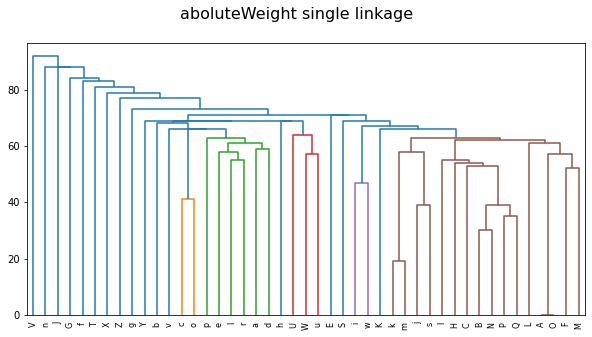

In [ ]:
single_linkage_matrix = sch.linkage(condensed_matrix, "single")
fig = plt.figure(figsize=(10, 5))
fig.suptitle("aboluteWeight single linkage", fontsize=16)
dn = sch.dendrogram(single_linkage_matrix, labels = labels)
ns_single_absw = newick_parameters(single_linkage_matrix, labels)
ns_single_absw

'((((((((((((((((((J,C),(G,E)),(M,F)),(((O,A),K),L)),(((Q,P),I),H)),((N,B),T)),V),(Z,Y)),f),(((d,a),g),e)),(m,k)),n),((p,b),X)),((r,l),(o,c))),((s,j),U)),(((u,W),h),S)),v),(w,i));'

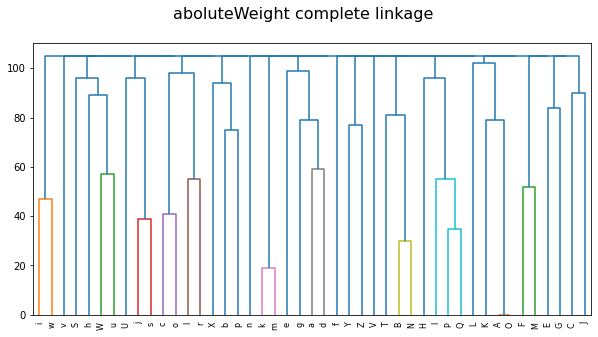

In [ ]:
complete_linkage_matrix = sch.linkage(condensed_matrix, "complete")
fig = plt.figure(figsize=(10, 5))
fig.suptitle("aboluteWeight complete linkage", fontsize=16)
dn = sch.dendrogram(complete_linkage_matrix, labels = labels)
ns_complete_absw = newick_parameters(complete_linkage_matrix, labels)
ns_complete_absw

'((((((g,f),(w,i)),V),((((s,j),C),(m,k)),((((u,W),U),h),S))),(((((N,B),T),(((Q,P),I),H)),(((M,F),L),((O,A),K))),((G,E),J))),(((((((r,l),(o,c)),v),((d,a),e)),((p,b),X)),(Z,Y)),n));'

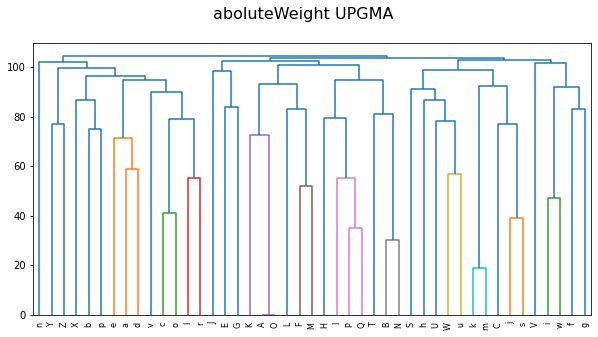

In [ ]:
UPGMA_linkage_matrix = sch.linkage(condensed_matrix, "average")
fig = plt.figure(figsize=(10, 5))
fig.suptitle("aboluteWeight UPGMA", fontsize=16)
dn = sch.dendrogram(UPGMA_linkage_matrix, labels = labels)
ns_UPGMA_absw = newick_parameters(UPGMA_linkage_matrix, labels)
ns_UPGMA_absw

Create the distance matrix for absolute weight from the complex graph with distance measure "absolute weight". Transform the matrix into an Numpy array.

In [ ]:
adj_matrix_addw = complex_graph.get_adjacency(attribute="additiveLengthNormalization")
adj_array_addw = np.array(adj_matrix_addw.data)

Create the condensed distance matrix by transferring the values of the Numpy array of the distance matrix to the condesed matrix template.

In [ ]:
for i in range(ldim):
  for j in range(ldim):
    condensed_matrix[int(ldim * j - j * (j +1) /2 + i-1-j)] = adj_array_addw[i][j]

Calculate the similarity matrix by replacing the entries of the distance matrix by the max value - the value.

In [ ]:
max_value = np.max(adj_array_addw)
for i in range(n):
  condensed_matrix[i]= max_value - condensed_matrix[i]

Create the Clustering for the absolute weights distance matrix with single linkage, complete linkage and UPGMA

'((((((M,F),(((w,i),(((((((((((u,U),W),h),((e,d),a)),S),b),(g,f)),((((Z,Y),X),((o,c),v)),p)),(((m,k),j),s)),(((G,E),(((((P,I),H),L),Q),((N,B),C))),T)),n)),r)),l),((O,A),K)),J),V);'

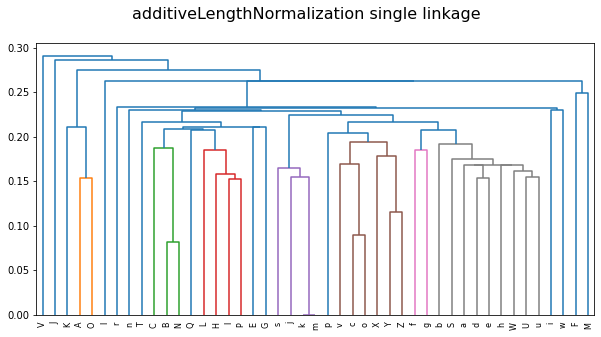

In [ ]:
single_linkage_matrix = sch.linkage(condensed_matrix, "single")
fig = plt.figure(figsize=(10, 5))
fig.suptitle("additiveLengthNormalization single linkage", fontsize=16)
dn = sch.dendrogram(single_linkage_matrix, labels = labels)
ns_single_absw = newick_parameters(single_linkage_matrix, labels)
ns_single_absw

'(((((((((((((((((((L,J),(G,E)),(M,F)),((O,A),K)),(((P,I),Q),H)),((N,B),T)),V),(Z,Y)),((e,d),a)),(g,f)),((h,W),S)),(m,k)),n),((p,b),X)),((r,l),(o,c))),((s,j),C)),(u,U)),v),(w,i));'

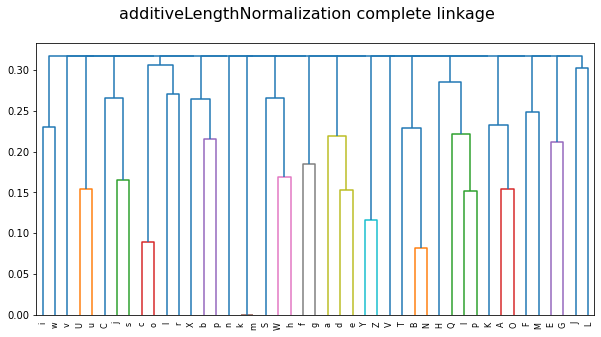

In [ ]:
complete_linkage_matrix = sch.linkage(condensed_matrix, "complete")
fig = plt.figure(figsize=(10, 5))
fig.suptitle("additiveLengthNormalization complete linkage", fontsize=16)
dn = sch.dendrogram(complete_linkage_matrix, labels = labels)
ns_UPGMA_absw = newick_parameters(complete_linkage_matrix, labels)
ns_UPGMA_absw

'((((((G,E),J),(((((P,I),Q),H),L),((N,B),T))),((((s,j),C),(m,k)),(((h,W),(u,U)),S))),((M,F),((O,A),K))),(((((w,i),(g,f)),((((e,d),a),r),n)),((((p,b),l),((o,c),v)),((Z,Y),X))),V));'

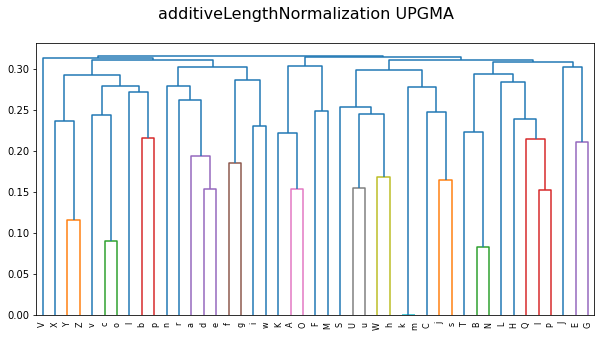

In [ ]:
UPGMA_linkage_matrix = sch.linkage(condensed_matrix, "average")
fig = plt.figure(figsize=(10, 5))
fig.suptitle("additiveLengthNormalization UPGMA", fontsize=16)
dn = sch.dendrogram(UPGMA_linkage_matrix, labels = labels)
ns_UPGMA_addw = newick_parameters(UPGMA_linkage_matrix, labels)
ns_UPGMA_addw

Create the distance matrix for absolute weight from the complex graph with distance measure "absolute weight". Transform the matrix into an Numpy array.



In [ ]:
adj_matrix_ml = complex_graph.get_adjacency( attribute="multiplicativeLengthNormalization")
adj_array_ml = np.array(adj_matrix_ml.data)

Create the condensed distance matrix by transferring the values of the Numpy array of the distance matrix to the condesed matrix template.

In [ ]:
for i in range(ldim):
  for j in range(ldim):
    condensed_matrix[int(ldim * j - j * (j +1) /2 + i-1-j)] = adj_array_ml[i][j]

Calculate the similarity matrix by replacing the entries of the distance matrix by the max value - the value.

In [ ]:
max_value = np.max(adj_array_ml)
for i in range(n):
  condensed_matrix[i]= max_value - condensed_matrix[i]

Create the Clustering for the multiplicative length normalization distance matrix with single linkage, complete linkage and UPGMA

'(((((((((((((((N,B),T),C),(((P,I),H),L)),(G,E)),(((((((((h,W),a),n),((u,U),S)),(e,d)),b),(((m,k),j),s)),(g,f)),(((((Z,Y),X),v),(o,c)),p))),Q),i),r),((O,K),A)),l),w),(M,F)),J),V);'

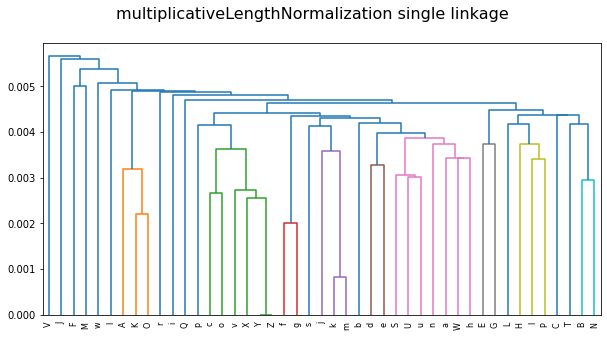

In [ ]:
single_linkage_matrix = sch.linkage(condensed_matrix, "single")
fig = plt.figure(figsize=(10, 5))
fig.suptitle("multiplicativeLengthNormalization single linkage", fontsize=16)
dn = sch.dendrogram(single_linkage_matrix, labels = labels)
ns_single_mlw = newick_parameters(single_linkage_matrix, labels)
ns_single_mlw

'(((((((((((((((((((L,J),(G,E)),(M,F)),((O,K),A)),(((P,I),H),Q)),((N,B),T)),V),(e,d)),(g,f)),((h,W),S)),((Z,Y),l)),(m,k)),(o,c)),(p,X)),((n,a),r)),((s,j),C)),(u,U)),(v,b)),(w,i));'

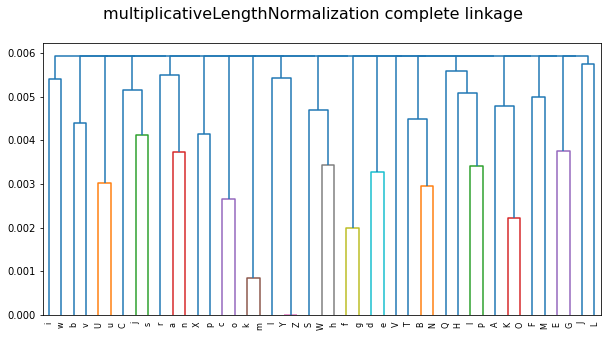

In [ ]:
complete_linkage_matrix = sch.linkage(condensed_matrix, "complete")
fig = plt.figure(figsize=(10, 5))
fig.suptitle("multiplicativeLengthNormalization complete linkage", fontsize=16)
dn = sch.dendrogram(complete_linkage_matrix, labels = labels)
ns_complete_mlw = newick_parameters(complete_linkage_matrix, labels)
ns_complete_mlw

'((((((((g,f),w),i),(((n,a),(e,d)),r)),(((s,j),(m,k)),(((u,U),S),(h,W)))),((((v,b),((Z,Y),X)),l),((o,c),p))),V),((((G,E),J),((((N,B),T),C),(((P,I),H),Q))),((((O,K),A),L),(M,F))));'

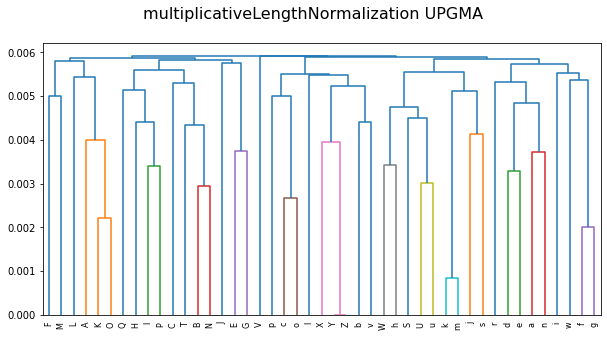

In [ ]:
UPGMA_linkage_matrix = sch.linkage(condensed_matrix, "average")
fig = plt.figure(figsize=(10, 5))
fig.suptitle("multiplicativeLengthNormalization UPGMA", fontsize=16)
dn = sch.dendrogram(UPGMA_linkage_matrix, labels = labels)
ns_average_mlw = newick_parameters(UPGMA_linkage_matrix, labels)
ns_average_mlw